### Adaboost回归算法

In [18]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn import tree
import graphviz

X,y = datasets.load_boston(return_X_y=True)

In [19]:
X.shape

(506, 13)

In [20]:
ada = AdaBoostRegressor(n_estimators=3,loss = 'linear',# 线性，误差绝对值
                                 learning_rate=1)#learning_rate 学习率

ada.fit(X,y)#训练
y_ = ada.predict(X)#预测
print(y_[:10])

[25.19593496 24.71214953 37.0057971  31.91111111 31.91111111 24.71214953
 20.81693548 18.04021739 15.66153846 18.04021739]


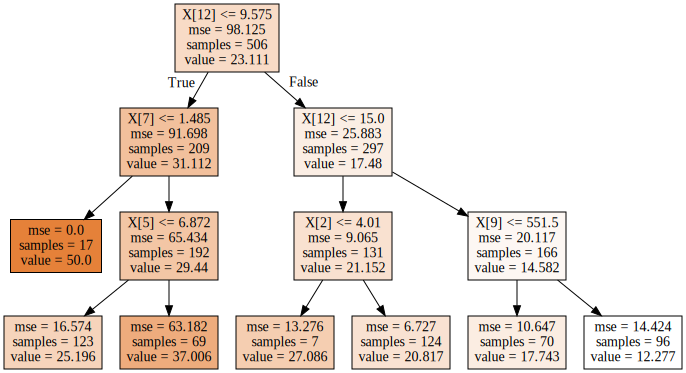

In [21]:
dot_data = tree.export_graphviz(ada[1],filled=True)
graph = graphviz.Source(dot_data)
graph

In [22]:
ada.estimator_errors_

array([0.1191377 , 0.22840154, 0.14824577])

In [23]:
ada.estimator_weights_

array([2.00062133, 1.21735904, 1.74842653])

### Adaboost回归算法代码演示

#### 构建第一棵树

In [24]:
w1 = np.full(shape = 506,fill_value=1/506) # 初始样本权重
y1_ = ada[0].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y1_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w1 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第一棵树更新权重，对应数学公式f
w2 = w1 * np.power(beta, (1. - error_vector))
w2 /= w2.sum() # 归一化
w2

第一棵树误差： 0.11913770165780468
算法误差： [0.1191377  0.22840154 0.14824577]
第一棵树权重： 2.00062133126869
算法权重： [2.00062133 1.21735904 1.74842653]


array([0.00157313, 0.00188264, 0.00183764, 0.00166728, 0.00205594,
       0.00201015, 0.00182174, 0.00249454, 0.00158807, 0.00164723,
       0.0022055 , 0.00164723, 0.00166527, 0.00205953, 0.00173582,
       0.00213805, 0.00168273, 0.00182918, 0.00149452, 0.00173582,
       0.00174029, 0.00156316, 0.00217274, 0.00162693, 0.00210866,
       0.00239474, 0.00195662, 0.00223876, 0.00171003, 0.00158028,
       0.00261975, 0.00162693, 0.00252354, 0.00254249, 0.00175336,
       0.00164723, 0.00151706, 0.0019691 , 0.00208443, 0.00235223,
       0.00186535, 0.0022194 , 0.00155856, 0.00149284, 0.00193984,
       0.00159865, 0.00151706, 0.00195662, 0.00230679, 0.00158673,
       0.00155151, 0.00204417, 0.00152396, 0.00164537, 0.00164723,
       0.00193647, 0.00149284, 0.00152662, 0.00165773, 0.00218659,
       0.00167207, 0.00204648, 0.00179997, 0.00250171, 0.00161811,
       0.00163311, 0.00158673, 0.00182712, 0.00184292, 0.00198389,
       0.00154976, 0.00166527, 0.00172094, 0.00164537, 0.00156

#### 构建第二棵树

In [34]:
y2_ = ada[1].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y2_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w2 * error_vector).sum()
print('第二棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第二棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第二棵树更新权重，对应数学公式f
w3 = w2 * np.power(beta, (1. - error_vector))
w3 /= w3.sum() # 归一化

第二棵树误差： 0.2284015441251376
算法误差： [0.1191377  0.22840154 0.14824577]
第二棵树权重： 1.2173590414536428
算法权重： [2.00062133 1.21735904 1.74842653]


#### 构建第三棵树

In [35]:
y3_ = ada[2].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y3_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w3 * error_vector).sum()
print('第三棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第三棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第三棵树更新权重，对应数学公式f
w4 = w3 * np.power(beta, (1. - error_vector))
w4 /= w4.sum() # 归一化

第三棵树误差： 0.14824576852271487
算法误差： [0.1191377  0.22840154 0.14824577]
第三棵树权重： 1.7484265298870978
算法权重： [2.00062133 1.21735904 1.74842653]


In [38]:
# 算法返回的值
y_ = ada.predict(X)[:20]
y_[:20]

array([25.19593496, 24.71214953, 37.0057971 , 31.91111111, 31.91111111,
       24.71214953, 20.81693548, 18.04021739, 15.66153846, 18.04021739,
       17.74285714, 20.81693548, 18.04021739, 24.71214953, 20.81693548,
       24.71214953, 24.71214953, 20.22721519, 20.81693548, 20.81693548])

In [39]:
# 第一棵树预测值
y1_ = ada[0].predict(X)[:20]
y1_[:20]

array([24.71214953, 24.71214953, 31.91111111, 31.91111111, 31.91111111,
       24.71214953, 20.22721519, 20.22721519, 15.66153846, 20.22721519,
       20.22721519, 20.22721519, 20.22721519, 24.71214953, 20.22721519,
       24.71214953, 24.71214953, 20.22721519, 20.22721519, 20.22721519])

In [44]:
y2_ = ada[1].predict(X)[:20]
y2_[:20]

array([25.19593496, 25.19593496, 37.0057971 , 37.0057971 , 37.0057971 ,
       25.19593496, 20.81693548, 17.74285714, 17.74285714, 17.74285714,
       17.74285714, 20.81693548, 17.74285714, 25.19593496, 20.81693548,
       25.19593496, 25.19593496, 20.81693548, 20.81693548, 20.81693548])

In [45]:
y3_ = ada[2].predict(X)[:20]
y3_[:20]

array([32.94      , 23.4221374 , 47.21136364, 29.28571429, 23.4221374 ,
       23.4221374 , 23.4221374 , 18.04021739, 11.7961039 , 18.04021739,
       11.7961039 , 23.4221374 , 18.04021739, 23.4221374 , 23.4221374 ,
       23.4221374 , 23.4221374 , 18.04021739, 23.4221374 , 23.4221374 ])

### 作业讲解

#### 方式一（参考Adaboost分类算法，根据权重进行融合）

In [43]:
w1,w2,w3 = ada.estimator_weights_
print(w1,w2,w3)

2.00062133126869 1.2173590414536428 1.7484265298870978


In [47]:
y_

array([25.19593496, 24.71214953, 37.0057971 , 31.91111111, 31.91111111,
       24.71214953, 20.81693548, 18.04021739, 15.66153846, 18.04021739,
       17.74285714, 20.81693548, 18.04021739, 24.71214953, 20.81693548,
       24.71214953, 24.71214953, 20.22721519, 20.81693548, 20.81693548])

In [48]:
(y1_ * w1 + y2_ * w2 + y3_ * w3)/(w1 + w2 + w3)

array([27.72735407, 24.37658483, 38.54637683, 32.23564122, 30.17136546,
       24.37658483, 21.49654093, 18.84831877, 14.81087997, 18.84831877,
       16.65007487, 21.49654093, 18.84831877, 24.37658483, 21.49654093,
       24.37658483, 24.37658483, 19.60183276, 21.49654093, 21.49654093])

#### 方式二（观察）中位数

In [49]:
y_

array([25.19593496, 24.71214953, 37.0057971 , 31.91111111, 31.91111111,
       24.71214953, 20.81693548, 18.04021739, 15.66153846, 18.04021739,
       17.74285714, 20.81693548, 18.04021739, 24.71214953, 20.81693548,
       24.71214953, 24.71214953, 20.22721519, 20.81693548, 20.81693548])

In [50]:
display(y1_,y2_,y3_)

array([24.71214953, 24.71214953, 31.91111111, 31.91111111, 31.91111111,
       24.71214953, 20.22721519, 20.22721519, 15.66153846, 20.22721519,
       20.22721519, 20.22721519, 20.22721519, 24.71214953, 20.22721519,
       24.71214953, 24.71214953, 20.22721519, 20.22721519, 20.22721519])

array([25.19593496, 25.19593496, 37.0057971 , 37.0057971 , 37.0057971 ,
       25.19593496, 20.81693548, 17.74285714, 17.74285714, 17.74285714,
       17.74285714, 20.81693548, 17.74285714, 25.19593496, 20.81693548,
       25.19593496, 25.19593496, 20.81693548, 20.81693548, 20.81693548])

array([32.94      , 23.4221374 , 47.21136364, 29.28571429, 23.4221374 ,
       23.4221374 , 23.4221374 , 18.04021739, 11.7961039 , 18.04021739,
       11.7961039 , 23.4221374 , 18.04021739, 23.4221374 , 23.4221374 ,
       23.4221374 , 23.4221374 , 18.04021739, 23.4221374 , 23.4221374 ])

In [53]:
y_result = np.c_[y1_,y2_,y3_]
y_result

array([[24.71214953, 25.19593496, 32.94      ],
       [24.71214953, 25.19593496, 23.4221374 ],
       [31.91111111, 37.0057971 , 47.21136364],
       [31.91111111, 37.0057971 , 29.28571429],
       [31.91111111, 37.0057971 , 23.4221374 ],
       [24.71214953, 25.19593496, 23.4221374 ],
       [20.22721519, 20.81693548, 23.4221374 ],
       [20.22721519, 17.74285714, 18.04021739],
       [15.66153846, 17.74285714, 11.7961039 ],
       [20.22721519, 17.74285714, 18.04021739],
       [20.22721519, 17.74285714, 11.7961039 ],
       [20.22721519, 20.81693548, 23.4221374 ],
       [20.22721519, 17.74285714, 18.04021739],
       [24.71214953, 25.19593496, 23.4221374 ],
       [20.22721519, 20.81693548, 23.4221374 ],
       [24.71214953, 25.19593496, 23.4221374 ],
       [24.71214953, 25.19593496, 23.4221374 ],
       [20.22721519, 20.81693548, 18.04021739],
       [20.22721519, 20.81693548, 23.4221374 ],
       [20.22721519, 20.81693548, 23.4221374 ]])

In [56]:
np.median(y_result,axis = 1)

array([25.19593496, 24.71214953, 37.0057971 , 31.91111111, 31.91111111,
       24.71214953, 20.81693548, 18.04021739, 15.66153846, 18.04021739,
       17.74285714, 20.81693548, 18.04021739, 24.71214953, 20.81693548,
       24.71214953, 24.71214953, 20.22721519, 20.81693548, 20.81693548])

### XGBoost使用方式一

In [14]:
# 导包加载数据
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier # 分类
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
X,y = datasets.load_wine(return_X_y=True) # 葡萄酒品质类别
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# 模型创建
model = XGBClassifier(learning_rate =0.1,# 学习率，控制每次迭代更新权重时的步长，默认0.3。值越小，训练越慢。
                      use_label_encoder=False,
                      n_estimators=5,# 总共迭代的次数，即决策树的个数
                      max_depth=5, # 深度
                      min_child_weight=1,# 默认值为1,。值越大，越容易欠拟合；值越小，越容易过拟合
                      gamma=0,# 惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                      subsample=0.8,# 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。防止overfitting。
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',# 目标函数
                      eval_metric = ['merror'],# 验证数据集评判标准
                      nthread=4,)# 并行线程数
# 数据
eval_set = [(X_test, y_test),(X_train,y_train)]

model.fit(X_train,y_train,eval_set = eval_set,verbose = True)

model.score(X_test,y_test)

[0]	validation_0-merror:0.05556	validation_1-merror:0.02817
[1]	validation_0-merror:0.00000	validation_1-merror:0.00704
[2]	validation_0-merror:0.00000	validation_1-merror:0.00000
[3]	validation_0-merror:0.00000	validation_1-merror:0.00000
[4]	validation_0-merror:0.00000	validation_1-merror:0.00000


1.0

### XGBoost方式二

In [15]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

param = {'learning_rate':0.1,'use_label_encoder':False,'n_estimators':10,
         'max_depth':5,'min_child_weight':1,'gamma':0,'subsample':0.8,
         'colsample_bytree':0.8, 'verbosity':0,'objective':'multi:softprob'}

model = xgb.XGBClassifier(**param) # **字典，遍历取出字典中的参数

model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric='merror',
        eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.00000
[1]	validation_0-merror:0.02778
[2]	validation_0-merror:0.02778
[3]	validation_0-merror:0.00000
[4]	validation_0-merror:0.00000
[5]	validation_0-merror:0.00000
[6]	validation_0-merror:0.00000
[7]	validation_0-merror:0.00000
[8]	validation_0-merror:0.00000
[9]	validation_0-merror:0.00000


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

### XGBoost使用方式三

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# 创建数据
dtrain = xgb.DMatrix(data = X_train,label = y_train)
dtest = xgb.DMatrix(data = X_test,label = y_test)

# 指定参数
param = {'learning_rate':0.1,'use_label_encoder':False,'n_estimators':20,
         'max_depth':5,'min_child_weight':1,'gamma':0,'subsample':0.8,'eval_metric':['merror'],
         'colsample_bytree':0.8, 'verbosity':0,'objective':'multi:softmax','num_class':3 }

num_round = 5
evals = [(dtest,'测试')]

bst = xgb.train(param, dtrain, num_round,evals = evals,)

# 进行预测
y_ = bst.predict(dtest)
display(y_,accuracy_score(y_test,y_))

[0]	测试-merror:0.11111
[1]	测试-merror:0.02778
[2]	测试-merror:0.02778
[3]	测试-merror:0.05556
[4]	测试-merror:0.02778


array([2., 1., 0., 1., 1., 1., 1., 1., 0., 2., 1., 2., 2., 0., 1., 2., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 2., 0., 1., 2., 1., 1.,
       2., 1.], dtype=float32)

0.9722222222222222